In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import csv

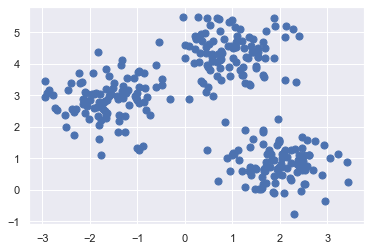

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)


In [16]:
data = pd.read_csv('co2_weekly_db.csv',delimiter=',')
df = pd.DataFrame(data)
df

,entry_num,year,month,decimal,average,ndays
0,2,2016,1,2016.0451,402.61,7
1,3,2016,1,2016.0642,402.98,6
2,4,2016,1,2016.0833,404.58,5
3,5,2016,2,2016.1025,403.81,5
4,6,2016,2,2016.1216,403.67,7
...,...,...,...,...,...,...
250,252,2020,11,2020.8347,411.76,6
251,253,2020,11,2020.8538,412.75,7
252,254,2020,11,2020.8730,412.53,6
253,255,2020,11,2020.8921,413.84,6


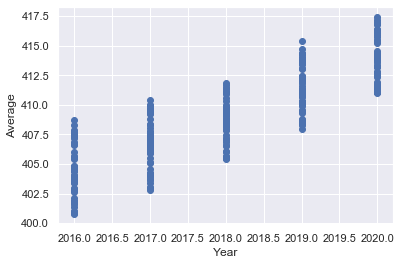

In [34]:
#X = df[['year','month','decimal','ndays']]
#Y = df['average']
#kmeans.fit(data.values)
#print(kmeans.labels_)
plt.scatter(data['year'],data['average'])
plt.xlabel('Year')
plt.ylabel('Average')
plt.show()

In [31]:
x = data.copy()

In [32]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
clusters = x.copy()
clusters['pred'] = kmeans.fit_predict(x)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

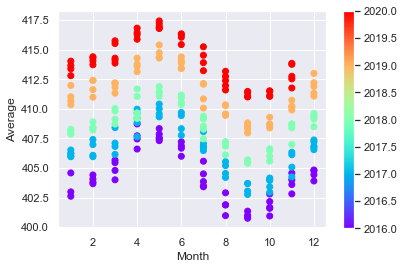

In [48]:
plot = plt.scatter(clusters['month'],clusters['average'],c=clusters['year'],cmap='rainbow')
plt.xlabel('Month')
plt.ylabel('Average')
plt.colorbar(plot)

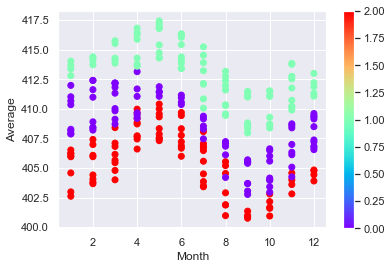

In [49]:
plot = plt.scatter(clusters['month'],clusters['average'],c=clusters['pred'],cmap='rainbow')
plt.xlabel('Month')
plt.ylabel('Average')
plt.colorbar(plot)

In [51]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [53]:
kmeans_new = KMeans(3)
kmeans.fit(x_scaled)
cluster_new = x.copy()
cluster_new['pred'] = kmeans_new.fit_predict(x_scaled)


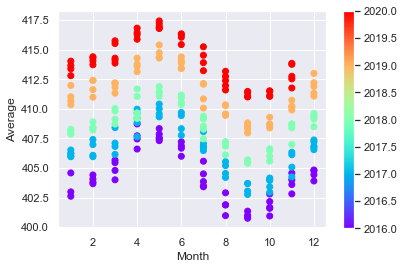

In [54]:
plot = plt.scatter(cluster_new['month'],cluster_new['average'],c=cluster_new['year'],cmap='rainbow')
plt.xlabel('Month')
plt.ylabel('Average')
plt.colorbar(plot)

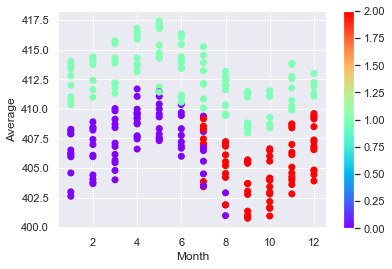

In [59]:
plot = plt.scatter(cluster_new['month'],cluster_new['average'],c=cluster_new['pred'],cmap='rainbow')
plt.xlabel('Month')
plt.ylabel('Average')
plt.colorbar(plot)

In [61]:
Year = data['year']
Avg = data['average']

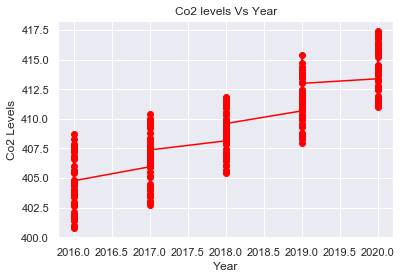

In [63]:
plt.plot(Year, Avg, color='red', marker='o')
plt.title('Co2 levels Vs Year')
plt.xlabel('Year')
plt.ylabel('Co2 Levels')
plt.show()

In [89]:
year_dict = {}
year_dict_avg = {}
max_year_avg = {}
for year in set(Year.values):
    year_dict[year] = []
    year_dict_avg[year] = []
    max_year_avg[year] = 0

In [90]:
for item, row in df.iterrows():
    year_dict[row['year']].append(row['average'])
    #year_dict_avg[row['year']].append(row['average'])

In [91]:
for year in year_dict:
    max_year_avg[year] = max(year_dict[year])
print(max_year_avg)

{2016: 408.72, 2017: 410.4, 2018: 411.87, 2019: 415.4, 2020: 417.43}


In [92]:

for item, row in df.iterrows():
    year_dict_avg[row['year']].append(int(max_year_avg[row['year']]) - int(row['average']))
print(year_dict_avg)

{2016: [6, 6, 4, 5, 5, 4, 4, 4, 4, 3, 3, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 3, 3, 4, 5, 5, 5, 6, 7, 7, 8, 8, 7, 8, 8, 8, 7, 7, 6, 6, 6, 5, 4, 4, 5, 4, 4, 4], 2017: [5, 4, 4, 4, 4, 4, 5, 4, 3, 4, 3, 4, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3, 2, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 7, 7, 6, 6, 6, 5, 4, 4, 4, 4, 4, 3, 3], 2018: [3, 4, 3, 4, 3, 3, 3, 3, 2, 3, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 3, 3, 3, 3, 2, 2, 2, 2], 2019: [5, 5, 4, 4, 4, 3, 5, 3, 3, 3, 4, 4, 3, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 5, 5, 5, 5, 6, 6, 7, 7, 7, 7, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3], 2020: [4, 5, 4, 3, 3, 3, 3, 4, 4, 3, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 3, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 4]}


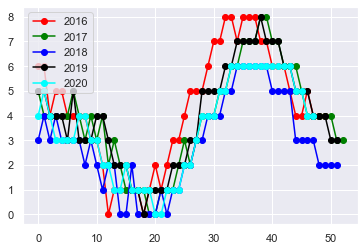

In [116]:

length_2016 = [i for i in range(len(year_dict_avg[2016]))]
length_2017 = [i for i in range(len(year_dict_avg[2017]))]
length_2018 = [i for i in range(len(year_dict_avg[2018]))]
length_2019 = [i for i in range(len(year_dict_avg[2019]))]
length_2020 = [i for i in range(len(year_dict_avg[2020]))]
plt.plot( np.array(length_2016), np.array(year_dict_avg[2016]), color='red', marker='o', label='2016')
plt.plot( np.array(length_2017), np.array(year_dict_avg[2017]), color='green', marker='o', label='2017')
plt.plot( np.array(length_2018), np.array(year_dict_avg[2018]), color='blue', marker='o', label='2018')
plt.plot( np.array(length_2019), np.array(year_dict_avg[2019]), color='black', marker='o', label='2019')
plt.plot( np.array(length_2020), np.array(year_dict_avg[2020]), color='cyan', marker='o', label='2020')
plt.legend()